在该 notebook，我们将介绍 xalpha 2020 引入的全新特性，及使用的典型范式，以期用户对 xalpha 的基本工作流有一个大致而全新的认识

## 基本设定

In [1]:
import xalpha as xa

holdings.py is found and loaded within xalpha dir


我们总是推荐用  xa.meth 的方式来调用 xalpha 中的函数，
import xalpha from meth 强烈不建议使用，可能导致部分运行时动态调整功能和设定失效

In [2]:
xa.set_backend(backend="csv", path="../../../lof/data", precached="20170101")

通过上述命令，我们设定了 xalpha 的全局本地缓存，可以将利用到的金融数据日线全部缓存到本地文件夹 path 中，并以 csv 文件的形式存在。
该缓存也支持数据库后端，backend="sql".
同时 precached 命令告诉缓存引擎，无论抓取的数据需要多少，都至少先将 20170101 至今的数据爬取并缓存到本地。

In [3]:
import logging

logger = logging.getLogger("xalpha")
logger.setLevel(logging.DEBUG)
ch = logging.StreamHandler()
ch.setLevel(logging.DEBUG)
logger.addHandler(ch)

我们接下来设定 xalpha 的日志输出，上述设定表示打印 xalpha 所有 DEBUG 级别以上的日志，同时打印到 jupyter notebook 里，
这些内容详细记录了网络连接等 debug 信息。

## 使用日线和实时获取器

In [16]:
# 我们可以通过 get_daily 来获取几乎一切内容的日线信息
# 下边并未有 log，显示我们的缓存后端本来就有该文件
xa.get_daily("USD/CNY", start="20190101", end="20190113")

,date,close
487,2019-01-02,6.8482
488,2019-01-03,6.8631
489,2019-01-04,6.8586
490,2019-01-07,6.8517
491,2019-01-08,6.8402
492,2019-01-09,6.8526
493,2019-01-10,6.8160
494,2019-01-11,6.7909


In [15]:
# 对与人民币美元中间价的获取，log 显示了更新，和爬取到 20170101 的过程
xa.get_daily("SGD/CNY", start="20200301")

Fetching url: http://www.chinamoney.com.cn/ags/ms/cm-u-bk-ccpr/CcprHisNew?startDate=2019-04-10&endDate=2020-04-04&currency=SGD/CNY&pageNum=1&pageSize=300 . Inside function `get_rmb`
Fetching url: http://www.chinamoney.com.cn/ags/ms/cm-u-bk-ccpr/CcprHisNew?startDate=2018-04-14&endDate=2019-04-09&currency=SGD/CNY&pageNum=1&pageSize=300 . Inside function `get_rmb`
Fetching url: http://www.chinamoney.com.cn/ags/ms/cm-u-bk-ccpr/CcprHisNew?startDate=2017-04-18&endDate=2018-04-13&currency=SGD/CNY&pageNum=1&pageSize=300 . Inside function `get_rmb`
Fetching url: http://www.chinamoney.com.cn/ags/ms/cm-u-bk-ccpr/CcprHisNew?startDate=2017-01-01&endDate=2017-04-17&currency=SGD/CNY&pageNum=1&pageSize=300 . Inside function `get_rmb`


,date,close
24,2020-03-02,5.0129
23,2020-03-03,5.0039
22,2020-03-04,5.0087
21,2020-03-05,5.0091
20,2020-03-06,5.0099
19,2020-03-09,5.0254
18,2020-03-10,5.0132
17,2020-03-11,5.0027
16,2020-03-12,4.9876
15,2020-03-13,4.9691


对于彭博数据的爬取，可能需要设定网络代理， xalpha 支持 http 和 socks 代理，并可以运行时随时设定随时取消。

In [14]:
xa.set_proxy("socks5://127.0.0.1:1080")  # 设置本地 socks 代理
df = xa.get_daily("BB-ZGLD:SW", prev=20)  # 抓取数据
xa.set_proxy()  # 取消代理
df

Using proxy socks5://127.0.0.1:1080
Fetching url: https://www.bloomberg.com/markets2/api/history/ZGLD:SW/PX_LAST?timeframe=1_MONTH&period=daily&volumePeriod=daily . Inside function `get_historical_frombb`


,date,close
1245,2020-03-16,434.75
1246,2020-03-17,449.35
1247,2020-03-18,440.00
1248,2020-03-19,441.45
1249,2020-03-20,444.55
1250,2020-03-23,463.00
1251,2020-03-24,487.90
1252,2020-03-25,483.75
1253,2020-03-26,481.80
1254,2020-03-27,474.50


In [17]:
# 获取英为数据
xa.get_daily("commodities/crude-oil", prev=10)

,date,open,close,high,low,percent
3158,2020-03-25,24.37,24.49,25.24,22.91,2.00%
3159,2020-03-26,24.25,22.60,24.65,22.38,-7.72%
3160,2020-03-27,23.29,21.51,23.44,20.88,-4.82%
3161,2020-03-30,20.93,20.09,20.93,19.27,-6.60%
3162,2020-03-31,20.23,20.48,21.89,20.01,1.94%
3163,2020-04-01,20.10,20.31,21.55,19.90,-0.83%
3164,2020-04-02,21.22,25.32,27.39,20.76,24.67%
3165,2020-04-03,24.71,24.05,24.71,23.52,-5.02%


In [18]:
# 获取 FT 数据
xa.get_daily("FTC-WTI+Crude+Oil", prev=10)

,date,open,close,high,low
812,2020-03-25,24.37,24.31,25.24,22.91
813,2020-03-26,24.25,23.18,24.65,22.38
814,2020-03-27,23.29,21.84,23.44,20.88
815,2020-03-30,20.93,20.28,20.93,19.27
816,2020-03-31,20.23,20.10,21.89,20.01
817,2020-04-01,20.10,21.20,21.55,19.90
818,2020-04-02,21.22,24.75,27.39,20.76
819,2020-04-03,24.81,24.88,25.21,23.52


In [19]:
# 获取标普各种指数数据
xa.get_daily("SP5475707.2", prev=10)

Fetching url: https://us.spindices.com/idsexport/file.xls?selectedModule=PerformanceGraphView&selectedSubModule=Graph&yearFlag=oneYearFlag&indexId=5475707 . Inside function `get_historical_fromsp`


,date,close
780,2020-03-25,896.87
781,2020-03-26,931.77
782,2020-03-27,875.53
783,2020-03-30,887.21
784,2020-03-31,928.01
785,2020-04-01,900.94
786,2020-04-02,962.12
787,2020-04-03,949.04


In [20]:
# 获取雅虎数据
xa.get_daily("YH-CSGOLD.SW", prev=8)

Fetching url: https://query1.finance.yahoo.com/v8/finance/chart/CSGOLD.SW?region=US&lang=en-US&includePrePost=false&interval=1d&range=5y&corsDomain=finance.yahoo.com&.tsrc=finance . Inside function `get_historical_fromyh`


,date,close,open,high,low
1250,2020-03-27,156.559998,155.820007,158.320007,155.240005
1251,2020-03-30,157.360001,158.059998,158.059998,156.259995
1252,2020-03-31,156.160004,156.619995,156.679993,153.899994
1253,2020-04-01,154.080002,153.720001,155.679993,152.619995
1254,2020-04-02,156.240005,154.300003,157.360001,153.660004
1255,2020-04-03,156.679993,155.800003,157.899994,155.399994


In [6]:
# 获取美股数据
xa.get_daily("LK", prev=5)

,date,open,close,high,low,percent
218,2020-03-30,26.50,25.60,26.80,25.02,-0.12
219,2020-03-31,26.36,27.19,29.53,26.01,6.21
220,2020-04-01,26.14,26.20,26.60,25.02,-3.64
221,2020-04-02,4.91,6.40,10.58,4.90,-75.57
222,2020-04-03,7.05,5.38,7.35,5.28,-15.94


In [7]:
# 获取 A 股数据
xa.get_daily("SH600000", prev=5)

Fetching url: https://stock.xueqiu.com/v5/stock/chart/kline.json?symbol=SH600000&begin=1586069190611&period=day&type=before&count=-1190 . Inside function `get_history`


,date,open,close,high,low,percent
1185,2020-03-30,10.18,10.28,10.28,10.11,0.39
1186,2020-03-31,10.30,10.15,10.36,10.13,-1.26
1187,2020-04-01,10.11,10.09,10.26,10.09,-0.59
1188,2020-04-02,10.09,10.20,10.20,10.07,1.09
1189,2020-04-03,10.13,10.15,10.21,10.12,-0.49


In [8]:
# 获取港股数据
xa.get_daily("HK00700", prev=5)

Fetching url: https://stock.xueqiu.com/v5/stock/chart/kline.json?symbol=00700&begin=1586069217747&period=day&type=before&count=-9 . Inside function `get_history`


,date,open,close,high,low,percent
1181,2020-03-30,371.8,376.6,380.0,371.6,-1.52
1182,2020-03-31,385.2,380.2,386.0,370.8,0.96
1183,2020-04-01,383.6,374.4,383.6,372.4,-1.53
1184,2020-04-02,370.0,379.8,379.8,369.6,1.44
1185,2020-04-03,372.0,376.4,376.4,372.0,-0.90


In [9]:
# 获取基金数据
xa.get_daily("F501018", prev=5)

Fetching url: http://fund.eastmoney.com/pingzhongdata/501018.js . Inside function `_basic_init`
Fetching url: http://fund.eastmoney.com/f10/jjfl_501018.html . Inside function `_feepreprocess`


no saved copy of 501018


,date,close
916,2020-03-30,0.5183
917,2020-03-31,0.5241
918,2020-04-01,0.5142
919,2020-04-02,0.5723


我们也可以通过 get_rt 获取实时数据，通过 get_bar 获取分钟线小时线等数据，以下是一些例子

In [3]:
xa.get_rt("PDD")

{'currency': 'USD',
 'current': 51.19,
 'current_ext': 51.39,
 'floatshare': None,
 'market': 'US',
 'name': '拼多多',
 'percent': 3.27,
 'time': '2020-04-28 04:00:00',
 'totshare': 1197626247,
 'volume': 4717569}

In [4]:
xa.get_rt("SH501018")
# 请注意第二次请求已经不需要去要雪球 token 了，因为已缓存

{'currency': 'CNY',
 'current': 0.717,
 'current_ext': None,
 'floatshare': None,
 'market': 'CN',
 'name': '南方原油LOF',
 'percent': -1.38,
 'time': '2020-04-28 09:30:04',
 'totshare': 3180963285,
 'volume': 7808665}

In [7]:
xa.get_rt("FT-INX:IOM")
# 请注意 FT 的实时数据存在延迟！

Fetching url: https://markets.ft.com/data/indices/tearsheet/summary?s=INX:IOM . Inside function `get_rt_from_ft`


{'currency': 'USD',
 'current': 2488.65,
 'current_ext': None,
 'market': None,
 'name': 'S&P 500 INDEX',
 'percent': -1.51}

In [8]:
xa.get_rt("INA-currencies/usd-cnh")
# 从 app 源获取英为实时数据

Fetching url: https://cnappapi.investing.com/currencies/usd-cnh . Inside function `get_cninvesting_rt`


{'currency': None,
 'current': 7.1119,
 'current_ext': None,
 'market': None,
 'name': 'USD/CNH - 美元 离岸人民币',
 'percent': 0.26}

In [9]:
xa.get_rt("SH600000", double_check=True)
# 获取 A 股数据，并经过新浪源的双重校验

Fetching url: https://xueqiu.com . Inside function `get_token`
Fetching url: https://stock.xueqiu.com/v5/stock/quote.json?symbol=SH600000&extend=detail . Inside function `get_xueqiu_rt`
Fetching url: https://hq.sinajs.cn/list=sh600000 . Inside function `get_rt_from_sina`


{'currency': 'CNY',
 'current': 10.15,
 'current_ext': None,
 'market': 'CN',
 'name': '浦发银行',
 'percent': -0.49}

In [10]:
xa.get_bar("indices/germany-30", interval=3600)
# 获取小时线数据

Fetching url: https://cn.investing.com/indices/germany-30 . Inside function `get_investing_id`
Fetching url: https://cn.investing.com/common/modules/js_instrument_chart/api/data.php?pair_id=172&pair_id_for_news=172&chart_type=area&pair_interval=3600&candle_count=24&events=yes&volume_series=yes&period= . Inside function `get_bar_frominvesting`


,date,close
0,2020-04-01 18:00:00,9583.50
1,2020-04-01 19:00:00,9551.50
2,2020-04-01 20:00:00,9533.00
3,2020-04-01 21:00:00,9559.75
4,2020-04-01 22:00:00,9586.75
5,2020-04-01 23:00:00,9539.50
6,2020-04-02 15:00:00,9542.25
7,2020-04-02 16:00:00,9565.75
8,2020-04-02 17:00:00,9548.75
9,2020-04-02 18:00:00,9594.25


下面简单演示对于承载数据的 pd.DataFrame 的简单处理和可视化

In [13]:
df = xa.get_daily("USD/CNY", prev=20)
df[df["date"] == "2020-04-02"].iloc[0]["close"]

7.0995

<IPython.core.display.Javascript object>


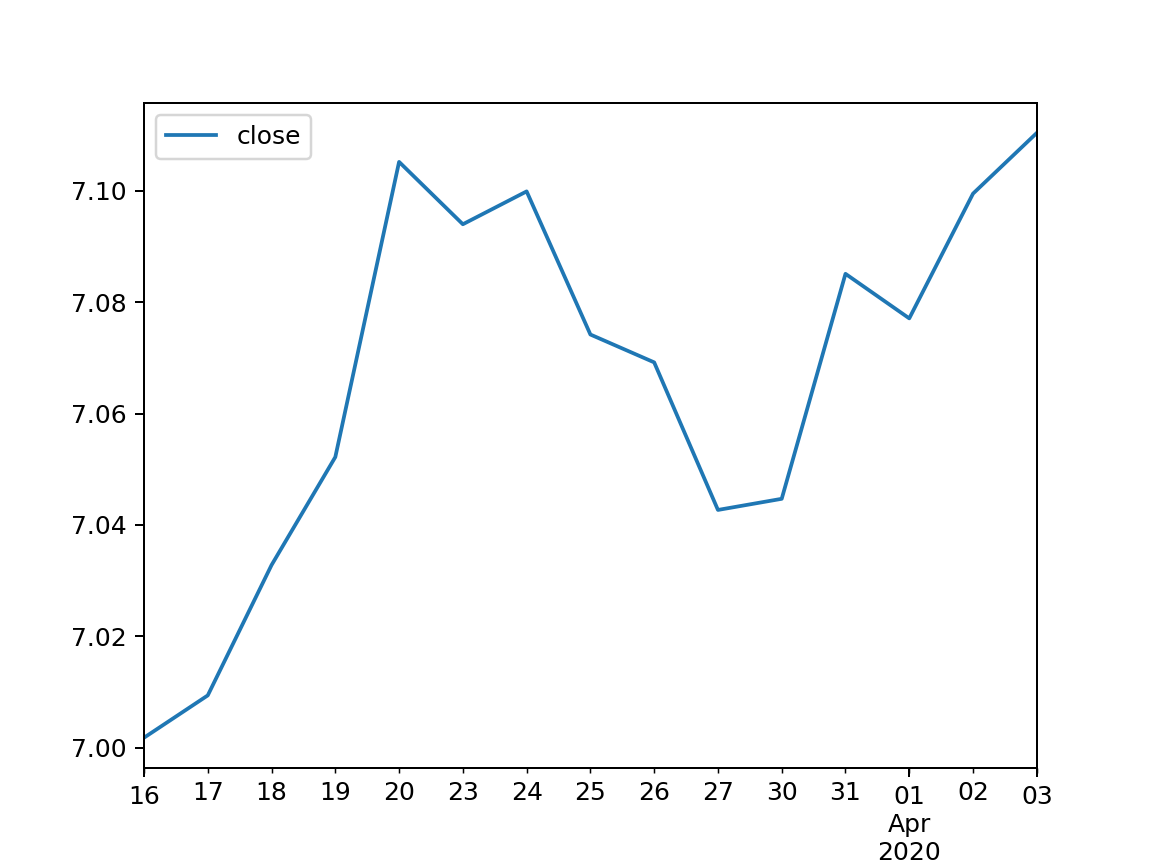

In [15]:
% matplotlib notebook
df.plot(x="date", y="close")

In [18]:
df[df["close"] > 7.08]

,date,close
781,2020-03-20,7.1052
782,2020-03-23,7.0940
783,2020-03-24,7.0999
788,2020-03-31,7.0851
790,2020-04-02,7.0995
791,2020-04-03,7.1104


In [19]:
df.sort_values("close")

,date,close
777,2020-03-16,7.0018
778,2020-03-17,7.0094
779,2020-03-18,7.0328
786,2020-03-27,7.0427
787,2020-03-30,7.0447
780,2020-03-19,7.0522
785,2020-03-26,7.0692
784,2020-03-25,7.0742
789,2020-04-01,7.0771
788,2020-03-31,7.0851


In [20]:
df["close"].pct_change()

777         NaN
778    0.001085
779    0.003338
780    0.002759
781    0.007515
782   -0.001576
783    0.000832
784   -0.003620
785   -0.000707
786   -0.003749
787    0.000284
788    0.005735
789   -0.001129
790    0.003165
791    0.001535
Name: close, dtype: float64

## 使用对比类

Fetching url: http://fund.eastmoney.com/pingzhongdata/501018.js . Inside function `_basic_init`
DEBUG:xalpha.cons:Fetching url: http://fund.eastmoney.com/pingzhongdata/501018.js . Inside function `_basic_init`
Fetching url: http://fund.eastmoney.com/f10/jjfl_501018.html . Inside function `_feepreprocess`
DEBUG:xalpha.cons:Fetching url: http://fund.eastmoney.com/f10/jjfl_501018.html . Inside function `_feepreprocess`
Fetching url: http://fund.eastmoney.com/pingzhongdata/160216.js . Inside function `_basic_init`
DEBUG:xalpha.cons:Fetching url: http://fund.eastmoney.com/pingzhongdata/160216.js . Inside function `_basic_init`
Fetching url: http://fund.eastmoney.com/f10/jjfl_160216.html . Inside function `_feepreprocess`
DEBUG:xalpha.cons:Fetching url: http://fund.eastmoney.com/f10/jjfl_160216.html . Inside function `_feepreprocess`


<IPython.core.display.Javascript object>


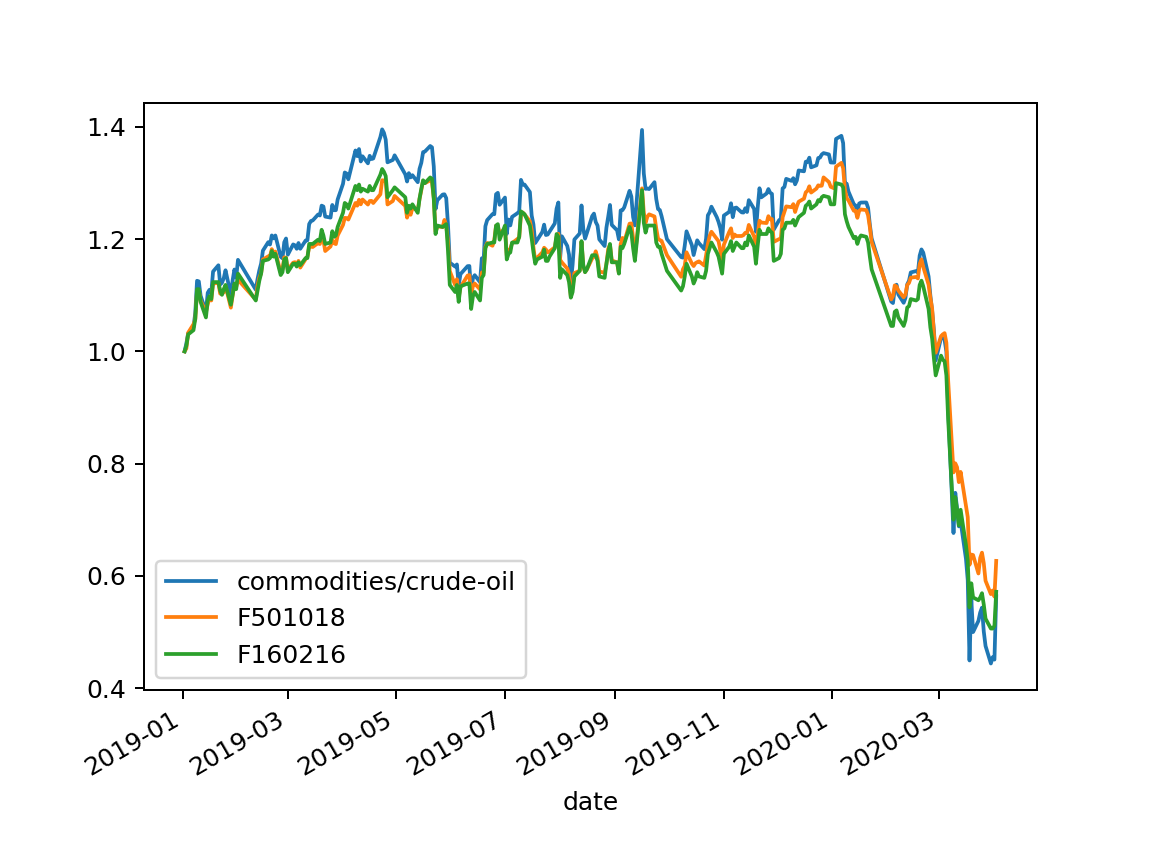

In [21]:
c = xa.Compare(("commodities/crude-oil", "USD"), "F501018", "F160216", start="20190101")
c.v()

In [22]:
c.corr()  # 打印关联系数

,commodities/crude-oil,F501018,F160216
commodities/crude-oil,1.000000,0.870583,0.934701
F501018,0.870583,1.000000,0.952503
F160216,0.934701,0.952503,1.000000


## 使用聚宽数据

In [ ]:
# 使用聚宽数据需要激活数据源，如果之前没有激活的话
user = "jquser"
passw = "jqpassw"
xa.provider.set_jq_data(user, passw)

In [4]:
df = xa.get_daily("mcm-MAC_SALE_RETAIL_MONTH", start="20180301")
# 获取宏观数据，商品零售总额
df

,id,stat_month,retail_sin,retail_acc,retail_sin_yoy,retail_acc_yoy,scale_retail_sin,scale_retail_acc,scale_retail_sin_yoy,scale_retail_acc_yoy,...,hotel_scale_retail_acc_yoy,sale_retail_sin,sale_retail_acc,sale_retail_sin_yoy,sale_retail_acc_yoy,sale_scale_retail_sin,sale_scale_retail_acc,sale_scale_retail_sin_yoy,sale_scale_retail_acc_yoy,date
1,404,2018-03-01,29193.6000,90275.4000,10.1000,9.8000,11831.8000,34941.0000,9.0000,8.5000,...,8.0000,26095.0000,80563.9000,10.0000,9.800,11112.5000,32754.7000,8.9000,8.6000,2018-03-01
2,405,2018-04-01,28541.9000,118817.3000,9.4000,9.7000,11240.6000,46136.9000,7.8000,8.4000,...,7.7000,25517.4000,106081.3000,9.4000,9.700,10540.4000,43247.9000,7.8000,8.4000,2018-04-01
3,406,2018-05-01,30359.1000,149176.4000,8.5000,9.5000,11476.7000,57517.7000,5.5000,7.8000,...,7.1000,27038.4000,133119.7000,8.4000,9.400,10735.6000,53888.1000,5.6000,7.8000,2018-05-01
4,407,2018-06-01,30841.6000,180017.9000,9.0000,9.4000,12448.3000,69937.6000,6.5000,7.5000,...,7.2000,27441.0000,160560.7000,8.9000,9.300,11671.3000,65538.2000,6.4000,7.6000,2018-06-01
5,419,2018-07-01,30733.7000,210751.6000,8.8000,9.3000,11419.0000,81125.2000,5.7000,7.3000,...,7.0000,27390.5000,187951.2000,8.7000,9.200,10655.2000,75978.8000,5.7000,7.3000,2018-07-01
6,420,2018-08-01,31542.3000,242293.9000,9.0000,9.3000,11832.2000,92367.7000,6.0000,7.1000,...,7.1000,28026.2000,215977.4000,8.9000,9.200,11041.1000,86460.3000,5.9000,7.1000,2018-08-01
7,421,2018-09-01,32005.4000,274299.3000,9.2000,9.3000,12761.7000,104792.1000,5.7000,6.9000,...,7.0000,28558.5000,244535.9000,9.2000,9.200,11961.6000,98099.3000,5.6000,6.9000,2018-09-01
8,422,2018-10-01,35534.4000,309833.7000,8.6000,9.2000,12478.6000,117177.5000,3.7000,6.6000,...,6.8000,31528.4000,276064.3000,8.5000,9.100,11630.1000,109637.1000,3.6000,6.6000,2018-10-01
9,423,2018-11-01,35259.7000,345093.4000,8.1000,9.1000,13678.7000,130829.9000,2.1000,6.1000,...,6.5000,30734.7000,306799.1000,8.0000,9.000,12862.1000,122473.1000,2.0000,6.1000,2018-11-01
10,424,2018-12-01,35893.4983,380986.8522,8.1608,8.9817,15084.0071,145311.2873,2.4369,5.7055,...,6.4283,31471.9353,338270.9998,8.0408,8.921,14174.7441,136074.9283,2.2457,5.6575,2018-12-01


<IPython.core.display.Javascript object>


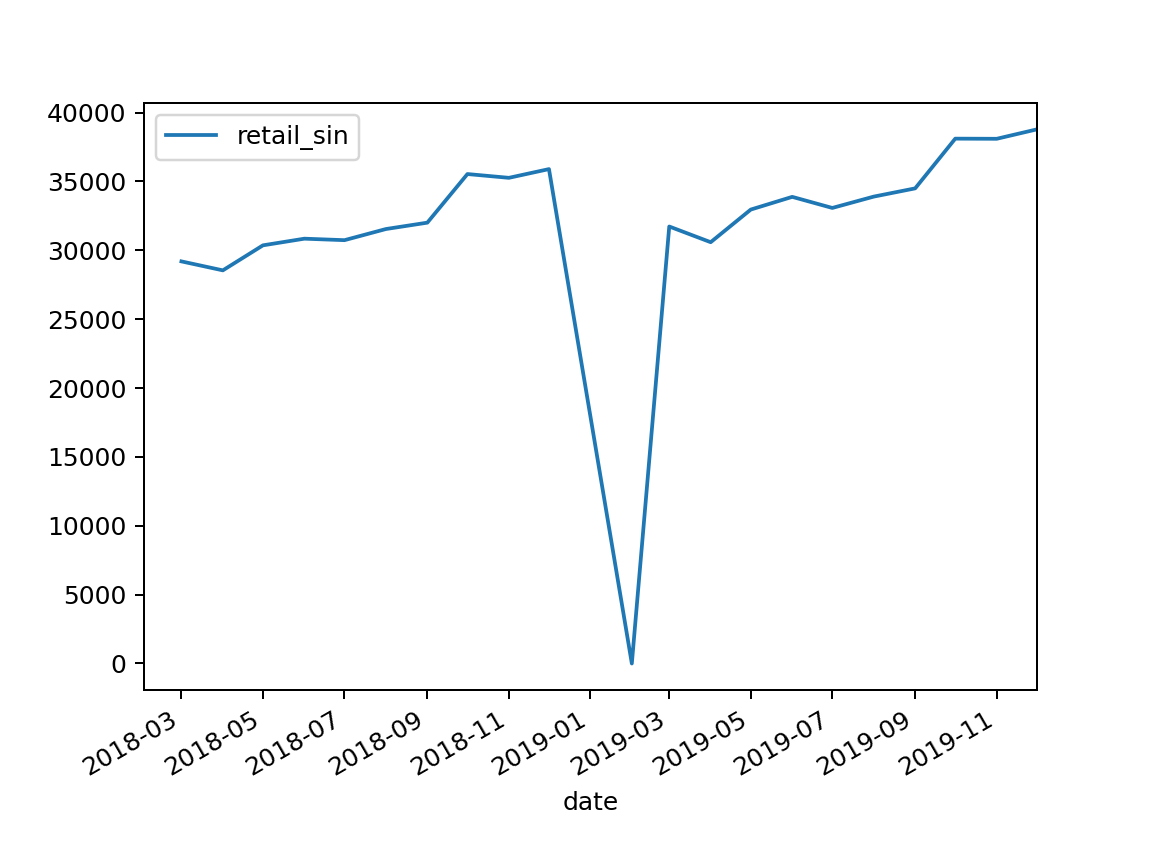

In [9]:
%matplotlib notebook
df.plot(x="date", y="retail_sin")

<IPython.core.display.Javascript object>


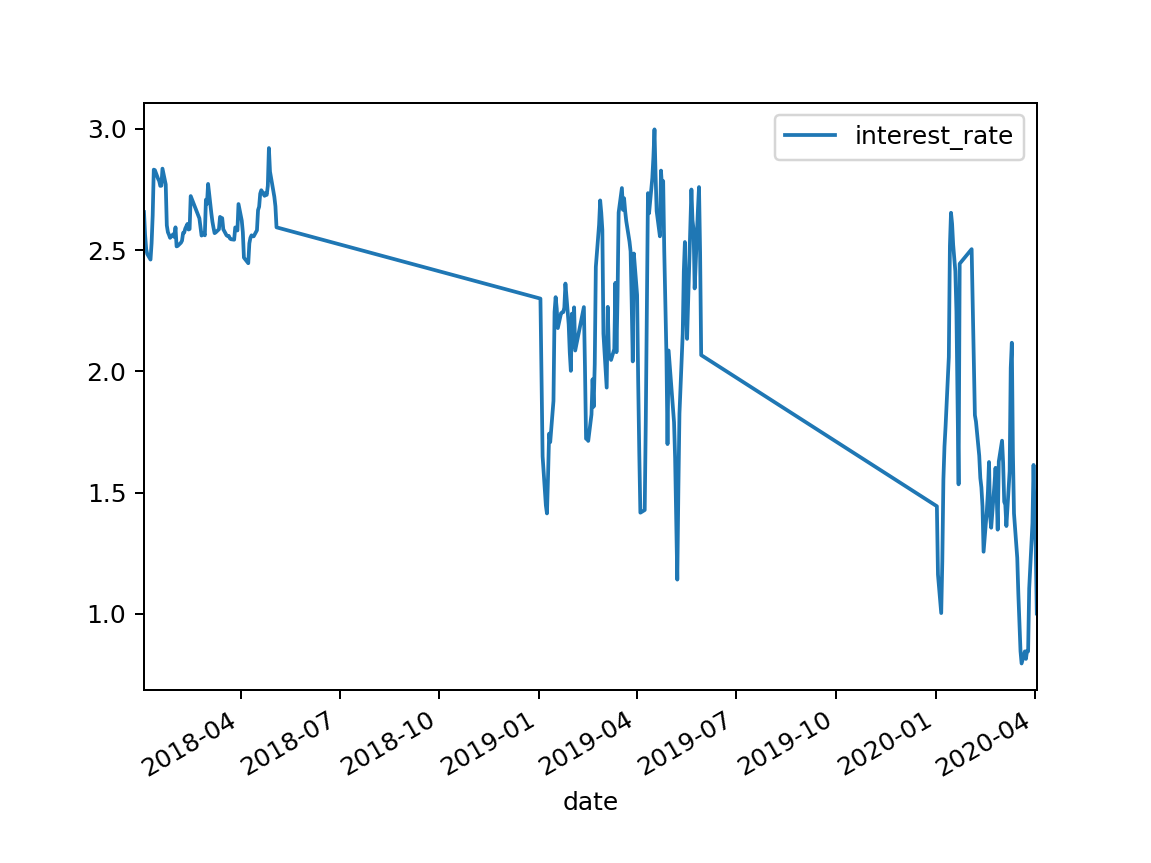

In [17]:
df = xa.get_daily("mcd-MAC_LEND_RATE", start="2018-01-01")
df = df[(df["currency_name"] == "人民币") & (df["market_id"] == 5) & (df["term_id"] == 20)]
%matplotlib notebook
df.plot(x="date", y="interest_rate")

In [21]:
# 指数成分股和权重
xa.get_daily("iw-SH000050", start="20200331", end="20200405")

,code,date,display_name,weight
1950,600000.XSHG,2020-04-01,浦发银行,1.812
1951,600009.XSHG,2020-04-01,上海机场,1.668
1952,600016.XSHG,2020-04-01,民生银行,1.953
1953,600028.XSHG,2020-04-01,中国石化,1.901
1954,600030.XSHG,2020-04-01,中信证券,2.290
1955,600031.XSHG,2020-04-01,三一重工,2.363
1956,600036.XSHG,2020-04-01,招商银行,1.891
1957,600050.XSHG,2020-04-01,中国联通,1.959
1958,600104.XSHG,2020-04-01,上汽集团,1.920
1959,600196.XSHG,2020-04-01,复星医药,2.779


<IPython.core.display.Javascript object>


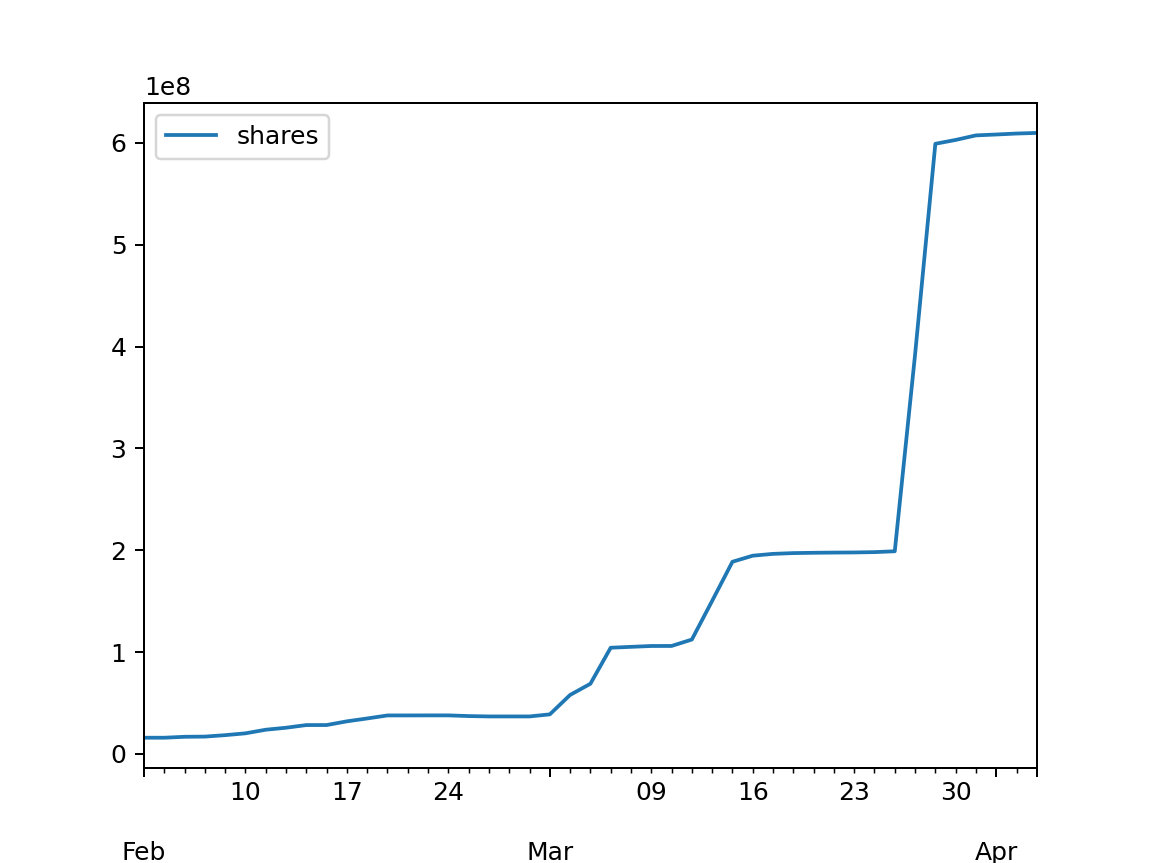

In [23]:
# 场内基金份额
df = xa.get_daily("fs-SZ161129", start="20200201")
df.plot(x="date", y="shares")

根据实际权重的指数估值分析

In [25]:
h = xa.PEBHistory("SH000050", start="2013-01-01")

Fetching url: https://stock.xueqiu.com/v5/stock/quote.json?symbol=SH000050&extend=detail . Inside function `get_xueqiu_rt`


In [26]:
h.summary()

Fetching url: https://stock.xueqiu.com/v5/stock/chart/kline.json?symbol=SH000050&begin=1586072240181&period=day&type=before&count=-1190 . Inside function `get_history`


指数50等权估值情况



Fetching url: https://stock.xueqiu.com/v5/stock/quote.json?symbol=SH000050&extend=detail . Inside function `get_xueqiu_rt`


现在 PE 绝对值 10.801, 相对分位 24.27%，距离最低点 12.9 %

现在 PB 绝对值 1.305, 相对分位 4.22%，距离最低点 8.0 %



<IPython.core.display.Javascript object>


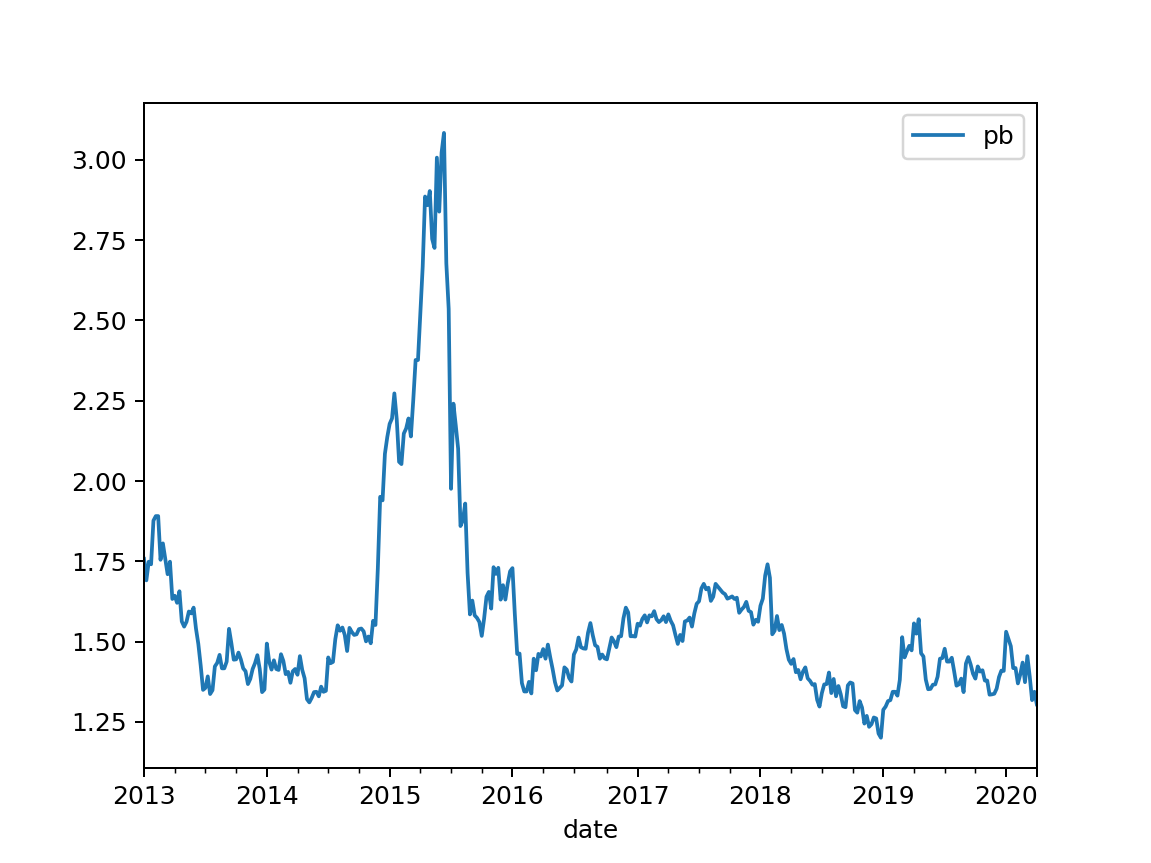

In [27]:
h.v("pb")

In [28]:
# 指数成份股总盈利和总净资产
df = xa.get_daily("teb-SH000050", start="20180101")

<IPython.core.display.Javascript object>


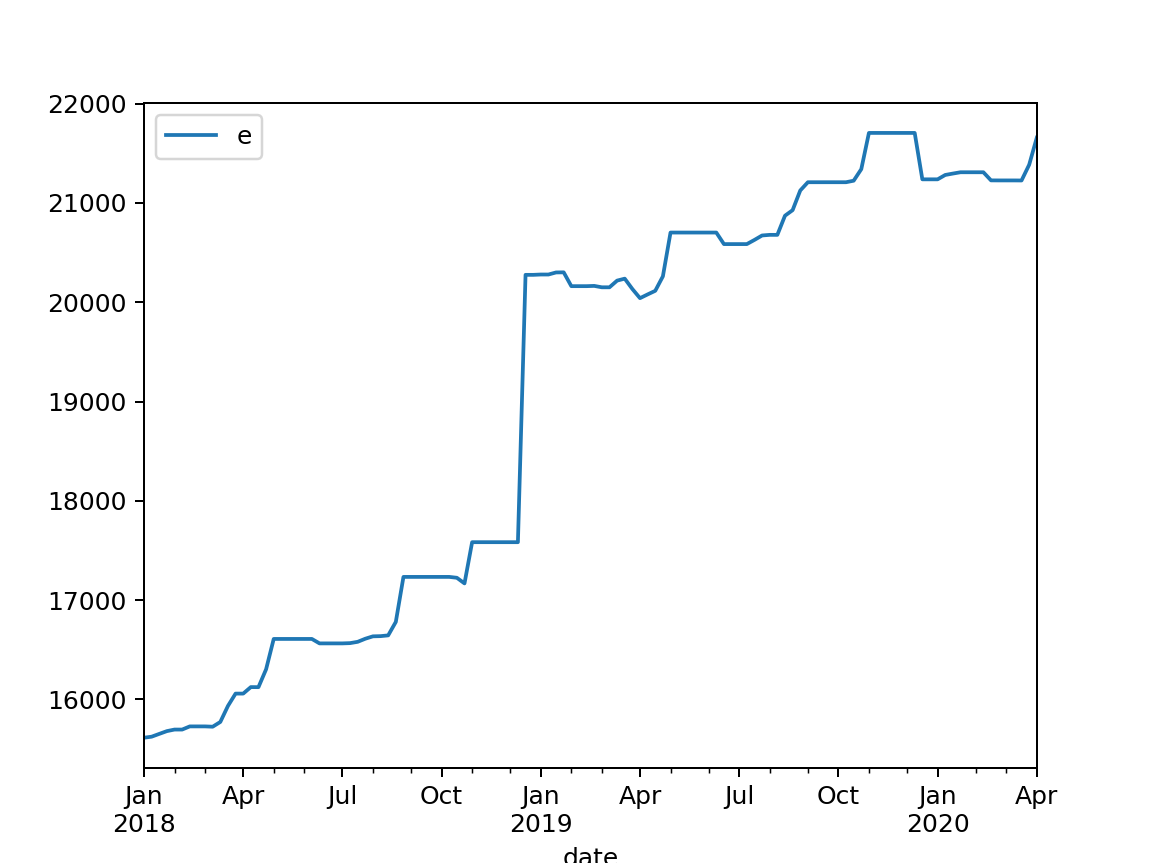

In [29]:
df.plot(x="date", y="e")

<IPython.core.display.Javascript object>


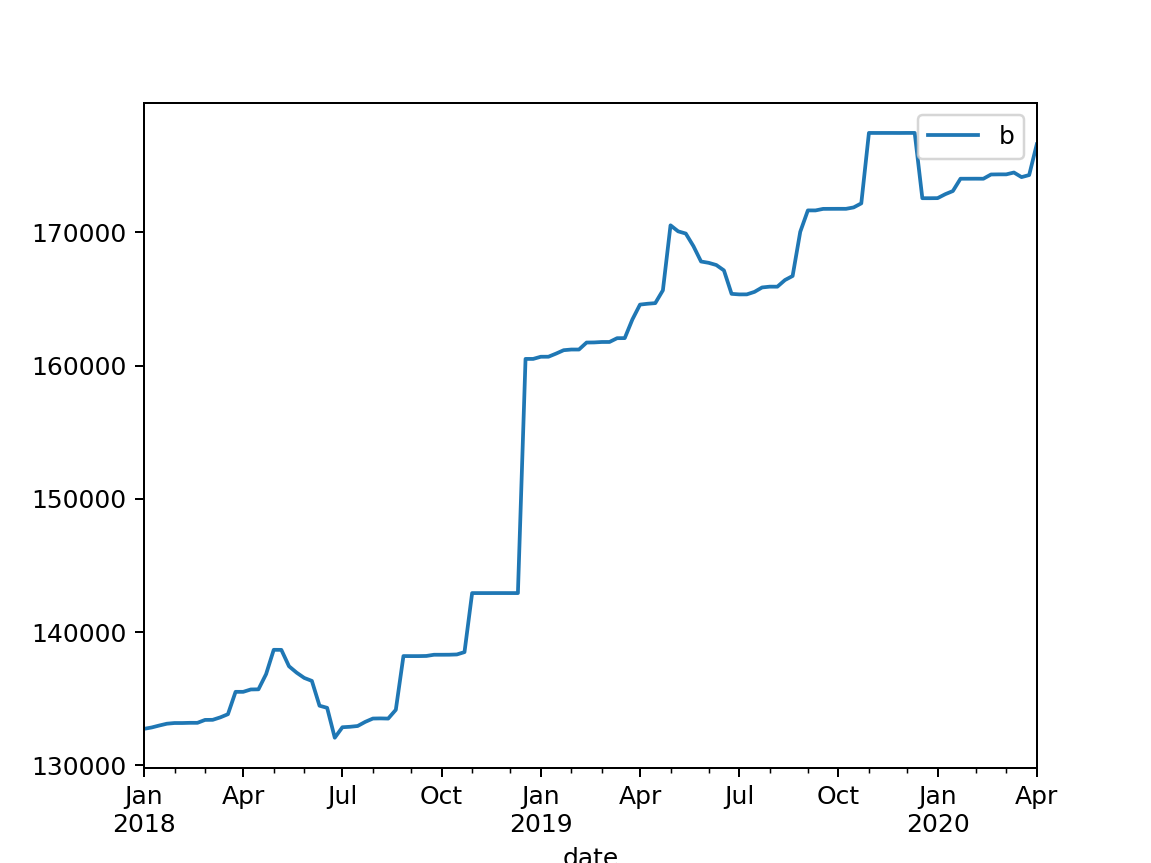

In [30]:
df.plot(x="date", y="b")

<IPython.core.display.Javascript object>


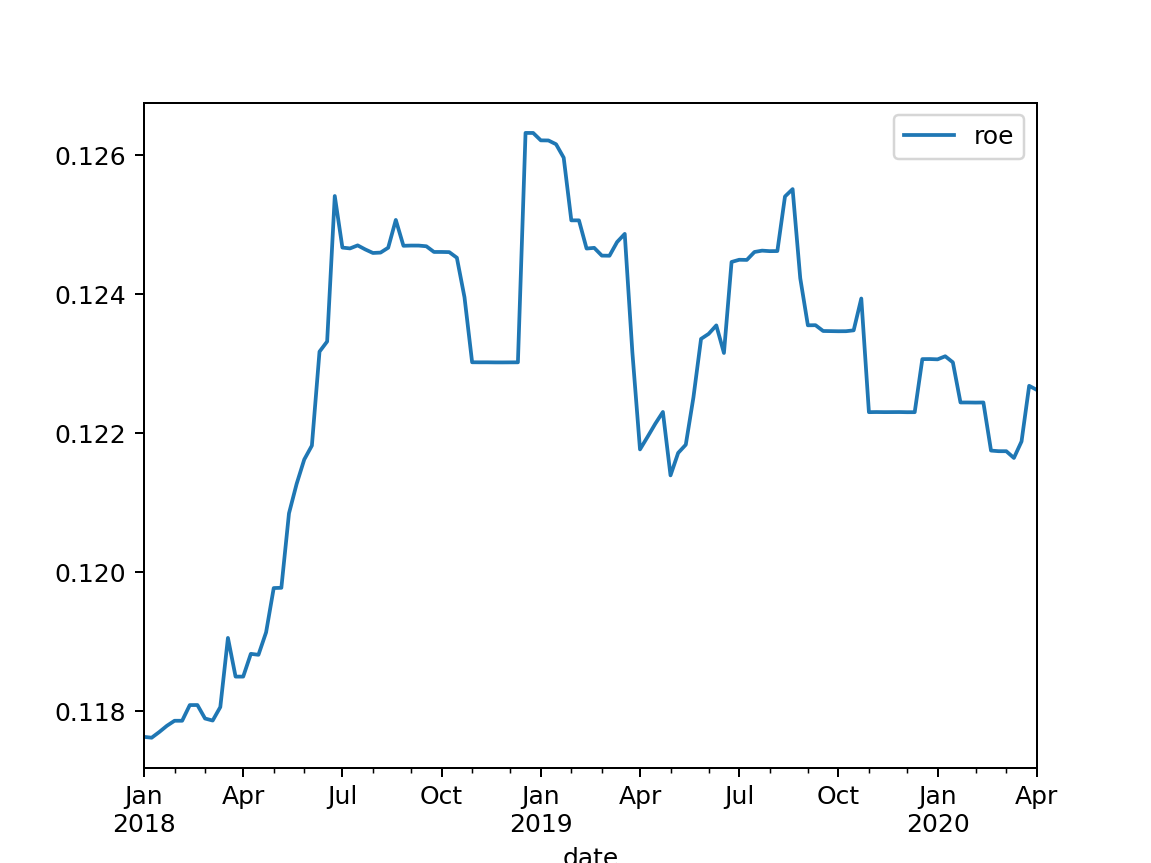

In [31]:
df["roe"] = df["e"] / df["b"]
df.plot(x="date", y="roe")

## 预测 QDII 净值

In [32]:
p = xa.QDIIPredict("SH501018")

In [33]:
p.get_t1()

Fetching url: http://fund.eastmoney.com/501018.html . Inside function `get_newest_netvalue`


(0.6273979738441035, '2020-04-03')

## 一些更炫酷的可视化

In [5]:
df = xa.get_daily("LK")

In [5]:
xa.set_display("notebook")
df

<IPython.core.display.Javascript object>

,date,open,close,high,low,volume,percent
0,2019-05-17,25.000,20.38,25.96,18.81,38937520.0,19.88
1,2019-05-20,21.020,18.61,21.02,18.40,8140028.0,-8.68
2,2019-05-21,18.590,17.33,18.74,17.33,8572283.0,-6.88
3,2019-05-22,17.000,14.75,17.33,14.70,19697257.0,-14.89
4,2019-05-23,14.470,15.79,15.95,13.71,9626529.0,7.05
...,...,...,...,...,...,...,...
219,2020-03-31,26.360,27.19,29.53,26.01,14511390.0,6.21
220,2020-04-01,26.140,26.20,26.60,25.02,8356180.0,-3.64
221,2020-04-02,4.910,6.40,10.58,4.90,264323498.0,-75.57
222,2020-04-03,7.050,5.38,7.35,5.28,95299981.0,-15.94


In [6]:
df.v_kline()